# Practical work 4: Frequency filtering, color

In [1]:
import numpy as np
from numpy.fft import fft2,ifft2,fftshift
import matplotlib.pyplot as plt
from PIL import Image

def imshow(I,title=None,size=500):
    """ display an image with a specific size """
    plt.figure(figsize=(size//80,size//80))
    plt.gray()
    plt.imshow(I)
    if title: plt.title(title)
    plt.show()


## Exercice 1 - Frequency filtering

1. Compute than display the centered module of Fourier transform of `img/mandrill.png` (use functions seen in previous lessons). 

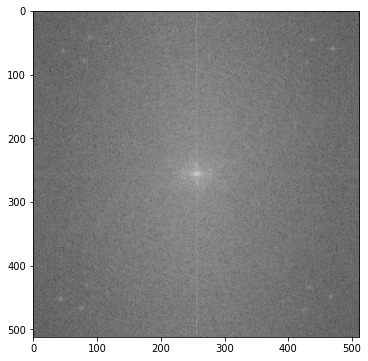

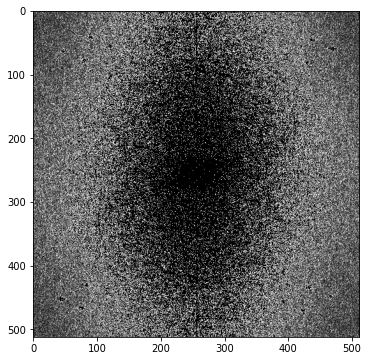

In [2]:
def plotFT(signal, **kwargs):
    a = fftshift(np.abs(fft2(signal)))
    a = np.where(a>10000, 0, a)
    imshow(a)

def plotLogFT(signal, **kwargs):
    centeredFT = fftshift(np.abs(fft2(signal)))
    a = np.log(1 + np.abs(centeredFT))
    # a = np.where(a>10000, 0, a)
    imshow(a)

mandrill = np.array(Image.open('img/mandrill.png'))
plotLogFT(mandrill)
plotFT(mandrill)

2. Write a function `idealLowPassFilter(n,m,fc)` returning an ideal low pass filter with frequency cutoff $f_c$ and size $n\times m$. Recall: this function set to 1 pixels at Euclidian distance $f_c$ from the center (null frequency).

In [3]:
from ctypes import c_int


def idealLowPassFilter(n,m,fc):
    a = np.zeros((n,m))
    c_n = n/2
    c_m = m/2
    for i in range(n):
        for j in range(m):
            distance_i_n = np.abs(i - c_n)
            distance_i_m = np.abs(j - c_m)
            if np.sqrt(distance_i_n**2 + distance_i_m**2) <= fc:
                a[i,j] = 1
    return a
idealLowPassFilter(15,15,6)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.

3. Write a function `lowPass(I,fc)` performing a low pass filtering of an image $I$. The function should
 - compute the centered Fourier transform of $I$
 - multiply point-by-point the spectrum with the ideal low filter produced by `idealLowPassFilter()`
 - uncenter the filtered spectrum and apply the inverse Fourier transform (use function `ifft2()` from module `numpy.fft`)
 - return the real part of filtered image

In [4]:
def lowPass(I, fc):
    
    n, m = I.shape
    centeredFT = fftshift(fft2(I)) # Ne pas ABS
    filtered_centeredFT = centeredFT * idealLowPassFilter(n,m,fc)
    return ifft2(fftshift(filtered_centeredFT)).real

4. Experiment this function on `img/mandrill.png` and `img/lena.jpg` with various values of cut off $f_c$.
 - give two effects that appears when $f_c$ decreases,
 - propose two applications of this filtering.


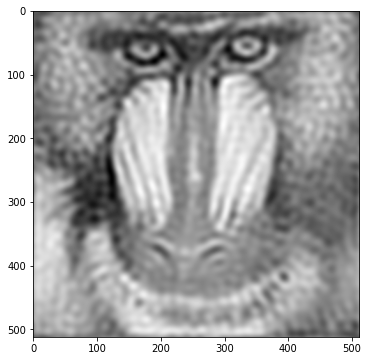

In [5]:
imshow(lowPass(mandrill, 30))

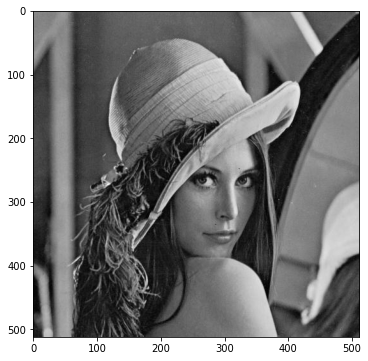

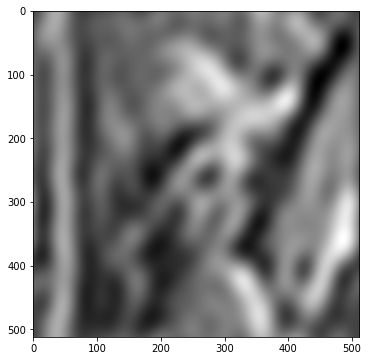

In [6]:
lena = np.array(Image.open("./img/lena.jpg"))
imshow(lowPass(lena, 1000))
imshow(lowPass(lena, 10))

**Les contours dans l'image disparaisse plus on filtre bas. C'est normal quand le filtre passe bas ne laisse pas passer les hautes fréquences qui représente les contours.**

**Je vais essayer avec un high pass**

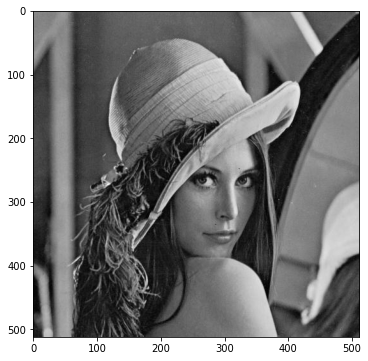

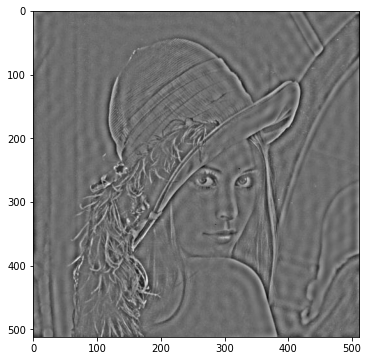

In [7]:
def idealHighPassFilter(n,m,fc):
    a = np.zeros((n,m))
    c_n = n/2
    c_m = m/2
    for i in range(n):
        for j in range(m):
            distance_i_n = np.abs(i - c_n)
            distance_i_m = np.abs(j - c_m)
            if np.sqrt(distance_i_n**2 + distance_i_m**2) >= fc:
                a[i,j] = 1
    return a

def highPass(I, fc):
    n, m = I.shape
    centeredFT = fftshift(fft2(I)) # Ne pas ABS
    filtered_centeredFT = centeredFT * idealHighPassFilter(n,m,fc)
    return ifft2(fftshift(filtered_centeredFT)).real

lena = np.array(Image.open("./img/lena.jpg"))
imshow(highPass(lena, 0))
imshow(highPass(lena, 25))


**Sympa :D**

**On peut voir les artefacts de Gibbs**

## Exercice 2 -  Linear filtering (convolution)

1. Given a kernel convolution of size $d\times d$, $d$ being odd. How many lines and columns should be added to each side of the image to apply this filter? The image is supposed surrounded by zero values.

On a donc une fenêtre de côté $d$. En prenant le premier pixel de l'image elle dépasse de $d//2$ ligne. On ajoutera donc ce nombre de ligne.

2. Write a function `imagePad(I,h)` getting an image and a kernel, returning a new image padded with zeros according to question 1. It is not allowed to use a module implementing the padding.

In [8]:
def imagePad(I,h):
    I_copy = I.copy()
    nb_line2add = h.shape[0]//2
    for i in range(nb_line2add):
        m = I_copy.shape[1]
        line = np.zeros(m)
        I_copy = np.vstack((I_copy,line))
        I_copy = np.vstack((line,I_copy))

        n = I_copy.shape[0]
        col = np.zeros(n).reshape((n,1))
        I_copy = np.hstack((I_copy,col))
        I_copy = np.hstack((col,I_copy))
    return I_copy
a = np.arange(1, 13).reshape((3,4))
display(a)
padded_I = imagePad(a, np.zeros((5,5)))
padded_I

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  2.,  3.,  4.,  0.,  0.],
       [ 0.,  0.,  5.,  6.,  7.,  8.,  0.,  0.],
       [ 0.,  0.,  9., 10., 11., 12.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

3. Write a function `conv2(I,h)` getting an image and a kernel and returning the convolution of $I$ by $h$. The function should return an image having the same shape than $I$. It is not allowed to use a module implementing the convolution.

In [24]:
def conv2(I,h):
    n, m = I.shape
    k, l = h.shape

    I_copy = I.copy()
    padded_I = imagePad(I,h)
    
    for i in range(n):
        for j in range(m):
            I_copy[i,j] = (padded_I[i : i + k,
                                    j : j + l] \
                                    * h).sum()
    return I_copy

4. Try this function on mean filter of size $3\times3$, $5\times 5$ and $7\times 7$. Discuss the results.

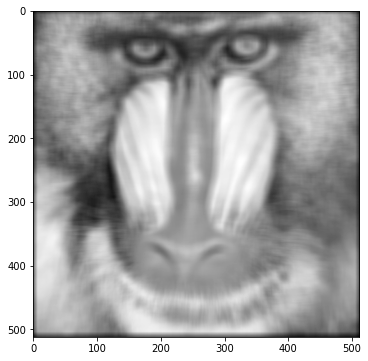

In [31]:
size = 15
h = np.zeros((size, size))+1/size**2
imshow(conv2(mandrill, h))

Lisse/flou l'image de plus en plus

5. Display the transfert function of these mean filters. For a better visualization, use the zero-padding technique to obtain a filter with a large size (for instance $256\times 256$). Use `imshow()` and `toVisualizeLogFT()`.

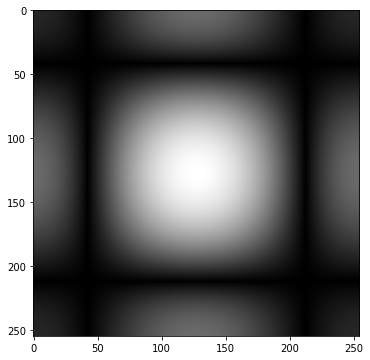

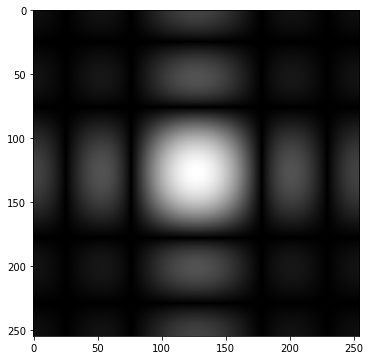

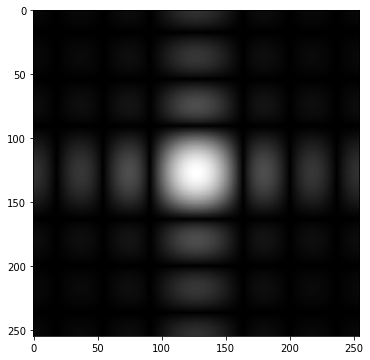

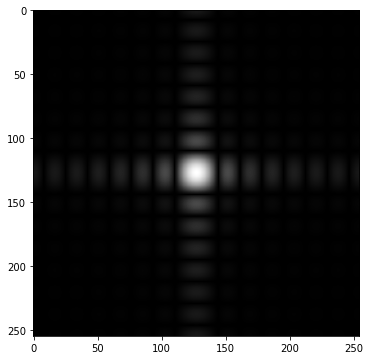

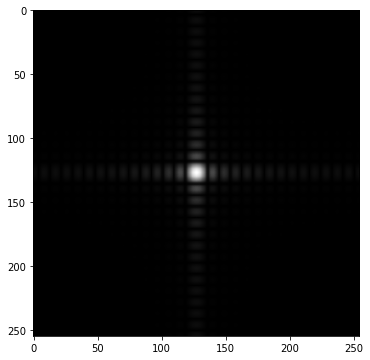

In [35]:
def computeFT(I):
    """ Array -> Array[complex] """
    return fft2(I)

def toVisualizeFT(If):
    """ Array[complex] -> Array[float] """
    centeredFT = fftshift(If)
    return np.abs(centeredFT)

def toVisualizeLogFT(If):
    """ Array[complex] -> Array[float] """
    centeredFT = fftshift(If)
    return np.log(1 + np.abs(centeredFT))

for size in [3, 5, 7, 15, 29]:
    h = np.zeros((size, size))+1/size**2
    padded_h = imagePad(h, np.zeros((256-size,256-size)))
    imshow(toVisualizeLogFT(fft2(padded_h)))

6. Interpretation: what is the analytic expression of the transfert function of a mean filter? Is  it an ideal low pass filter?

Sois $s$ tel que $2s+1=0$ la taille du filtre $s\times s$
$$
h(i,j) = 1/s, \forall i,j \in [-s/2, s/2]^2, 0 \text{ sinon}
$$

7. Bonus question: perform the same study for the Gaussian kernel. Determine $\sigma$ in order to have filter of size $3\times3$, $5\times5$, and $7\times7$.

On a la taille du kernel $s = 2 \left\lceil 3 \sigma  \right\rceil + 1 \Leftrightarrow \frac{1}{3}\left\lceil \frac{1}{2}(s - 1) \right\rceil $

(3, 3)
(5, 5)
(7, 7)
(15, 15)
(29, 29)


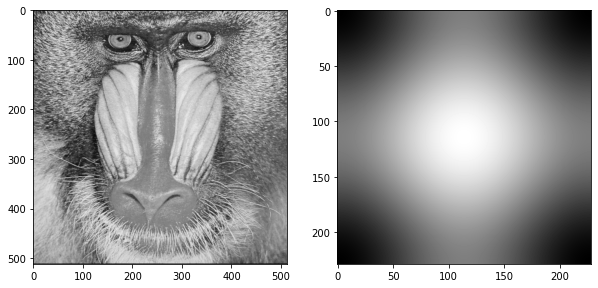

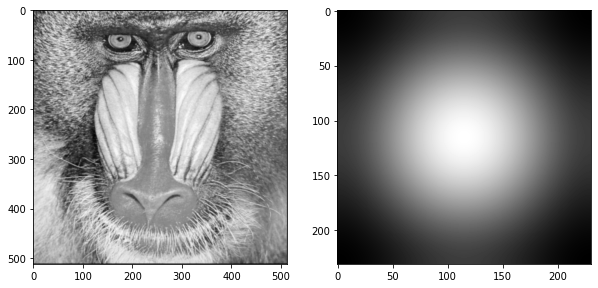

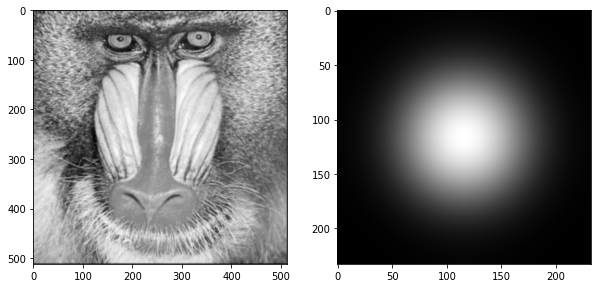

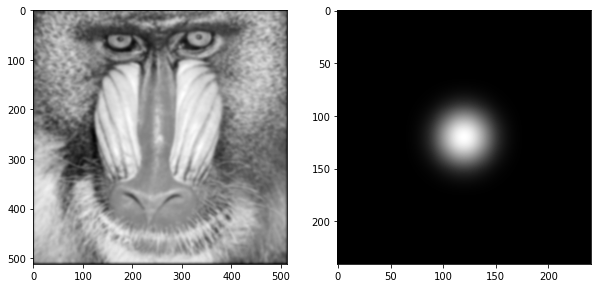

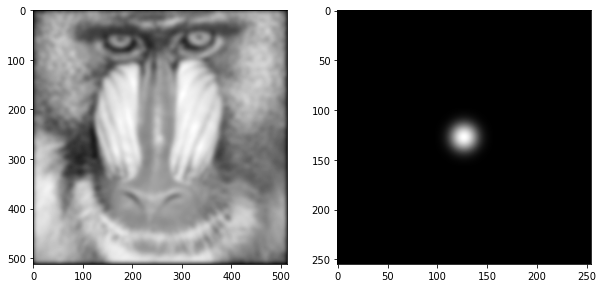

In [52]:
def gaussianKernel(sigma):
    """ double -> Array
        return a gaussian kernel of standard deviation sigma
    """
    n2 = int(np.ceil(3*sigma))
    x,y = np.meshgrid(np.arange(-n2,n2+1),np.arange(-n2,n2+1))
    kern = np.exp(-(x**2+y**2)/(2*sigma*sigma))
    return  kern/kern.sum()
### your answer start below
s = np.array([3, 5, 7, 15, 29])
s = (1/3) * ((0.5*(s-1)).astype(int)) # +1 car partie sup ? Visiblement non
for sigma in s:
    fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(10,15))
    h = gaussianKernel(sigma)
    print(h.shape)
    ax[0].imshow(conv2(mandrill, h))

    padded_h = imagePad(h, np.zeros((256-size,256-size)))
    ax[1].imshow(toVisualizeLogFT(fft2(padded_h)))

## Exercice 3: anti aliasing filtering

1. Give a code that subsamples of factor 2 (use function `subSample2()` given in TME3) the image `img/barbara.png`.

In [54]:
def subSample2(I):
    """ Array -> Array """
    return I[::2,::2]

2. Give a code that subsamples of factor 2 (use function `subSample2()`) the image `img/barbara.png` after applying an low pass filter (use `antiAliasingFilter()`). As comment, recall the principle of filtering in the frequency domain.

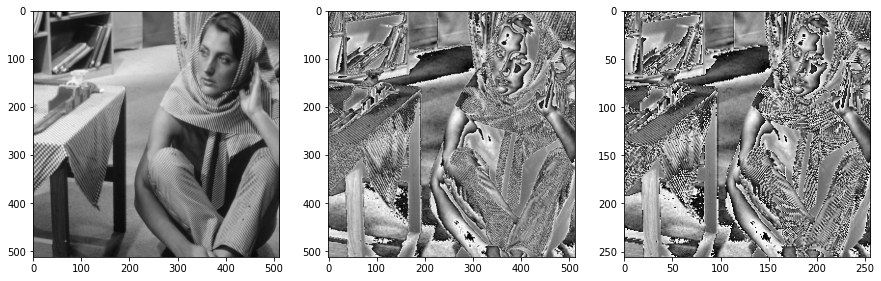

In [66]:
def antiAliasingFilter(n,m):
    """ int*int -> Array """
    n2, m2 = n//2, m//2
    rn, rm = n//4, m//4
    A = np.zeros((n, m))
    A[rn:rn+n2, rm:rm+m2] = 1
    return A
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,20))
barbara = np.array(Image.open('./img/barbara.png'))
h = antiAliasingFilter(5,5)

f_barbara = conv2(barbara, h)
sub_f_barbara = subSample2(f_barbara)

ax[0].imshow(barbara)
ax[1].imshow(f_barbara)
ax[2].imshow(sub_f_barbara)

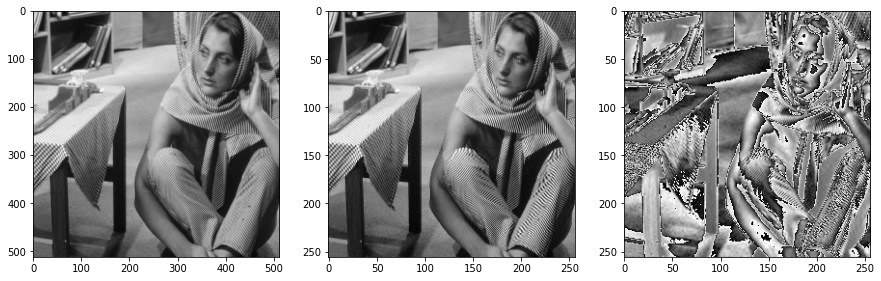

In [68]:
def antiAliasingFilter(n,m):
    """ int*int -> Array """
    n2, m2 = n//2, m//2
    rn, rm = n//4, m//4
    A = np.zeros((n, m))
    A[rn:rn+n2, rm:rm+m2] = 1
    return A
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,20))
barbara = np.array(Image.open('./img/barbara.png'))
h = antiAliasingFilter(5,5)

sub_barbara = subSample2(barbara)
sub_f_barbara = conv2(sub_barbara, h)

ax[0].imshow(barbara)
ax[1].imshow(sub_barbara)
ax[2].imshow(sub_f_barbara)

3. Describe and analyze the filtering of Barbara with and without the anti aliasing filter. What information is lost for the two filtered images ?

## Exercice 4: color image
1. Read images `img/clown.bmp` and `img/clown_lumi.bmp` as two arrays named $I_1$ and $I_2$. Display these images examine their shape. What difference there are between them?

3 caneaux RGB en plus sur la première image. traduit dans la 3 ème dimension

(512, 512, 3)


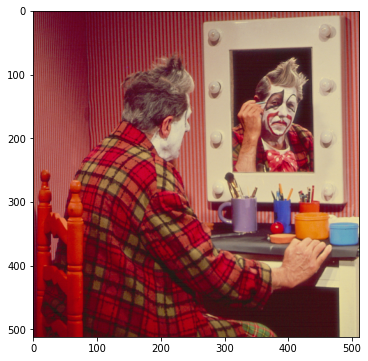

(512, 512)


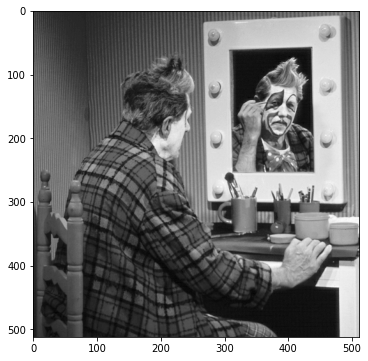

In [71]:
clown = np.array(Image.open('img/clown.bmp'))
clown2 = np.array(Image.open('img/clown_lumi.bmp'))
print(clown.shape)
imshow(clown)
print(clown2.shape)
imshow(clown2)

2. The first image is an array of dimension 3. Explain the signification of each dimension. From this image create 3 images $I_R$, $I_G$, $I_B$ of dimension 2. Display these three images and explain what you see.

3 caneaux RGB en plus sur la première image. traduit dans la 3 ème dimension

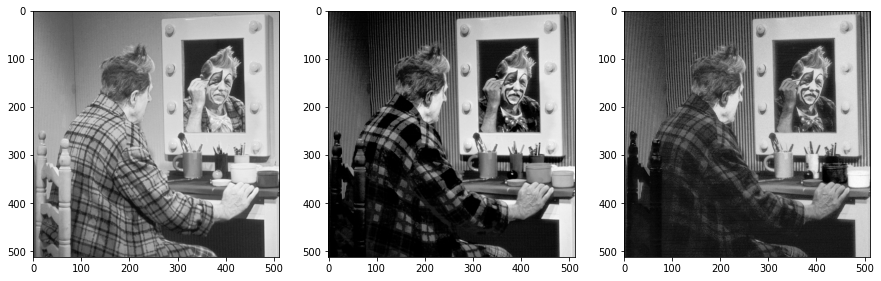

In [74]:
I_r = clown[:,:,0]
I_g = clown[:,:,1]
I_b = clown[:,:,2]
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,20))
ax[0].imshow(I_r)
ax[1].imshow(I_g)
ax[2].imshow(I_b)

3. Create a new image $I_3$ of dimensions 3, the first dimension contains the value of $I_R$, the second the value of $I_B$ and the third the values of $I_G$. Try another combinations. Remark: color images are better handled by `imshow()` if pixel values range in $[0,1]$.

4. Write a code that allows the see the first channel with red color scales, the second channel in green color scales, and the blue channel in blue color scales.